In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.formula.api as sfa
import statsmodels.api as sma

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=None

pd.options.display.max_rows=None


#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs
## Data Definition
age: Age of the policyholder (Numeric)

sex: Gender of the policyholder (Categoric)

weight: Weight of the policyholder (Numeric)

BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
no_of_dependents: Number of dependent persons on the policyholder (Numeric)

smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

claim: The amount claimed by the policyholder (Numeric) in dollars

blood pressure: Blood pressure reading of policyholder (Numeric)

diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)

job_title: Job profile of the policyholder (Categoric)

city: The city in which the policyholder resides (Categoric) 

hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)



from ydata_profiling import ProfileReport
profile=ProfileReport(data,title="Insurance claim")
profile.to_file(output_file= "Discharge_profiling.html")
profile

In [145]:
data_insurance=pd.read_csv("healthinsurance.csv")
data_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [146]:
j=1
for i in data_num:
    plt.subplot(2,3,j)
    sns.distplot(x=data_insurance[i])
    j+=1
plt.tight_layout()
plt.show()

NameError: name 'data_num' is not defined

### Checking and deleting the duplicates-

In [147]:
data_features=data_insurance.drop("claim",axis=1)
data_target=data_insurance["claim"]

In [148]:
data_insurance.duplicated().sum()

1096

In [149]:
data_insurance.drop_duplicates(inplace=True)

In [150]:
data_insurance.duplicated().sum()

0

In [151]:
data_insurance.dropna(inplace=True)

In [152]:
data_insurance.isna().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [153]:
data_num=data_features.select_dtypes(include=np.number)
data_num.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex'],
      dtype='object')

In [154]:
data_insurance["smoker"]=data_insurance["smoker"].astype("object")
data_insurance["regular_ex"]=data_insurance["regular_ex"].astype("object")
data_insurance["no_of_dependents"]=data_insurance["no_of_dependents"].astype("object")
data_insurance["diabetes"]=data_insurance["diabetes"].astype("object")

In [155]:
data_cat=data_features.select_dtypes(include=object)
data_cat.columns

Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')

### Encoding

In [156]:
data_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [157]:
data_cat["sex"]=pd.get_dummies(data_cat["sex"],drop_first=True)

In [158]:
data_cat["hereditary_diseases"].value_counts()

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64

In [159]:
data_insurance.groupby(["hereditary_diseases"]).mean()["claim"]

hereditary_diseases
Alzheimer       37653.499213
Arthritis       34075.801389
Cancer          40302.912766
Diabetes        39834.328205
Epilepsy        37856.120000
EyeDisease      41584.804545
HeartDisease    43086.019540
High BP         40605.910769
NoDisease       11605.987716
Obesity         39996.921359
Name: claim, dtype: float64

In [160]:
def disease(dis):
    if dis=="NoDisease":
        dis=0
    else:
        dis=1

In [161]:
data_cat["hereditary_diseases"] = data_cat["hereditary_diseases"] \
    .apply(lambda x: 0 if x == "NoDisease" else 1)

In [162]:
data_cat["hereditary_diseases"].value_counts()

0    13998
1     1002
Name: hereditary_diseases, dtype: int64

In [163]:
northeast_cities = ['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo', 'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford', 'Worcester']

south_cities = ['Atlanta', 'Brimingham', 'Charleston', 'Charlotte', 'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity', 'Kingsport']

midwest_cities = ['Marshall', 'Mandan', 'Waterloo', 'IowaCity', 'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina', 'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln', 'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton', 'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity', 'Escabana', 'Youngstown']

west_cities = ['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose', 'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno', 'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman', 'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix', 'SantaFe', 'Lovelock']

In [164]:
def regions(cities):
    if cities in northeast_cities:
        return "northeast cities"
    elif cities in south_cities:
        return "south cities"
    elif cities in midwest_cities:
        return "midwest cities"
    else:
        return "west cities"

In [165]:
data_cat["city"]=data_cat["city"].apply(regions)

In [166]:
data_cat["city"].value_counts()

south cities        4323
west cities         4273
northeast cities    3471
midwest cities      2933
Name: city, dtype: int64

In [167]:
data_cat = pd.get_dummies(data_cat, columns=["city"], drop_first=True)

In [168]:
data_cat.head()

,sex,hereditary_diseases,job_title,city_northeast cities,city_south cities,city_west cities
0,1,0,Actor,1,0,0
1,0,0,Engineer,1,0,0
2,0,1,Academician,1,0,0
3,0,0,Chef,1,0,0
4,0,0,HomeMakers,1,0,0


In [169]:
data_num.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex
0,60.0,64,24.3,1,0,72,0,0
1,49.0,75,22.6,1,0,78,1,1
2,32.0,64,17.8,2,1,88,1,1
3,61.0,53,36.4,1,1,72,1,0
4,19.0,50,20.6,0,0,82,1,0


In [170]:
data1=pd.concat([data_cat,data_num,data_insurance["claim"]],axis=1)

In [171]:
data1.head()

,sex,hereditary_diseases,job_title,city_northeast cities,city_south cities,city_west cities,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,1,0,Actor,1,0,0,60.0,64,24.3,1,0,72,0,0,13112.6
1,0,0,Engineer,1,0,0,49.0,75,22.6,1,0,78,1,1,9567.0
2,0,1,Academician,1,0,0,32.0,64,17.8,2,1,88,1,1,32734.2
3,0,0,Chef,1,0,0,61.0,53,36.4,1,1,72,1,0,48517.6
4,0,0,HomeMakers,1,0,0,19.0,50,20.6,0,0,82,1,0,1731.7


In [172]:
data1=data1.drop("job_title",axis=1)

In [173]:
data1.dropna(inplace=True)

### Base Model-

In [175]:
y=data1["claim"]
x=data1.drop("claim",axis=1)
x = sma.add_constant(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [176]:
y.shape

(12642,)

In [177]:
x.shape

(12642, 14)

In [178]:
x.reset_index(drop=True)
y.reset_index(drop=True)

0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
5         6474.0
6         1705.6
7         1534.3
8         5910.9
9        44400.4
10       28287.9
11        1837.2
12        2404.7
13        4827.9
14       10602.4
15       11073.2
16       15555.2
17        2709.2
18       11396.9
19        4827.9
20        1712.2
21        3056.4
22        1909.5
23       17942.1
24        3044.2
25       10942.1
26       41949.2
27       10928.9
28        7077.2
29        3077.1
30       29331.0
31       13012.2
32       12347.2
33       12928.8
34        1727.8
35        9058.7
36       14219.2
37        9411.0
38        1253.9
39       11394.1
40        1615.8
41       25992.8
42        1631.8
43        5266.4
44       10602.4
45        8891.1
46        5401.0
47       10325.2
48        4827.9
49       13470.8
50        9249.5
51       19199.9
52       26019.0
53       25517.1
54        4399.7
55       14005.6
56        2481.0
57        8534.7
58        5709

In [179]:
base_model=sma.OLS(y_train,x_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     2435.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:34:21   Log-Likelihood:            -1.0220e+05
No. Observations:               10113   AIC:                         2.044e+05
Df Residuals:                   10099   BIC:                         2.045e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7320.8487    460.877    -15.885      0.000   -8224.259   -6417.438
sex                     -52.6714    120.066     -0.439      0.661    -288.024     182.681
hereditary_diseases    1.197e+04    280.370     42.711      0.000    1.14e+04    1.25e+04
city_northeast cities    92.2278    180.145      0.512      0.609    -260.892     445.348
city_south cities       126.8821    172.905      0.734      0.463    -212.047     465.811
city_west cities         90.2591    171.611      0.526      0.599    -246.133     426.651
age                     264.9776      4.456     59.471      0.000     256.244     273.711
weight                  -30.4510      4.740     -6.424      0.000     -39.742     -21.160
bmi                     193.9790     10.266     18.895      0.000     173.856     214.102
no_of_dependents        437.3160     49.884      8.767      0.000     339.534     535.098
smoker                 1.954e+04    168.948    115.637      0.000    1.92e+04    1.99e+04
bloodpressure             5.0761      3.058      1.660      0.097      -0.918      11.070
diabetes               1228.9929    143.086      8.589      0.000     948.516    1509.470
regular_ex             -812.6561    140.806     -5.771      0.000   -1088.665    -536.648
==============================================================================
Omnibus:                     2947.834   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9622.877
Skew:                           1.477   Prob(JB):                         0.00
Kurtosis:                       6.757   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
y_predict=base_model.predict(x_test)

In [181]:
y_predict

5842     10712.049509
6848     22704.507671
5700     14269.474052
11270    13639.090811
10202     4245.344029
6476     12878.412495
8886     10675.297693
14691    25600.925955
2640     26633.064048
4469     11559.355616
8611      8948.190517
7648     27280.852595
10123    13417.199152
4131      3917.455837
3824     13214.240021
3412     11791.931850
10663    10901.818325
12685    14151.356682
1744     14151.627752
11226     9807.016538
3632      5376.096295
7246     32473.224562
11890     9735.788572
12059    35653.576892
13405    29393.541690
3934     30430.882058
12797    37770.767054
2427      4205.716514
6385      8014.879557
3048      9232.400397
7963     12259.624226
7689     25115.843385
11462    15079.543923
11202     4422.836842
3985     43687.978196
1556      7982.007245
13970     6876.642651
1140      1939.694959
1512     41394.729693
6892     14981.201852
12849     6126.758051
3251     12832.390277
7803     12476.438901
12058     3325.277559
4460      9389.642163
12105    1

In [182]:
r2_score(y_test,y_predict)

0.7736881935683558

*********************************************************************

### EDA -

In [99]:
data=pd.read_csv("healthinsurance.csv")
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [100]:
data.drop_duplicates(inplace=True)

In [101]:
data.duplicated().sum()

0

In [102]:
data.isna().sum()

age                    361
sex                      0
weight                   0
bmi                    901
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [103]:
data["bmi"]=data.groupby("weight")["bmi"].apply(lambda x:x.fillna(x.median()))

In [104]:
data["bmi"].isnull().sum()

0

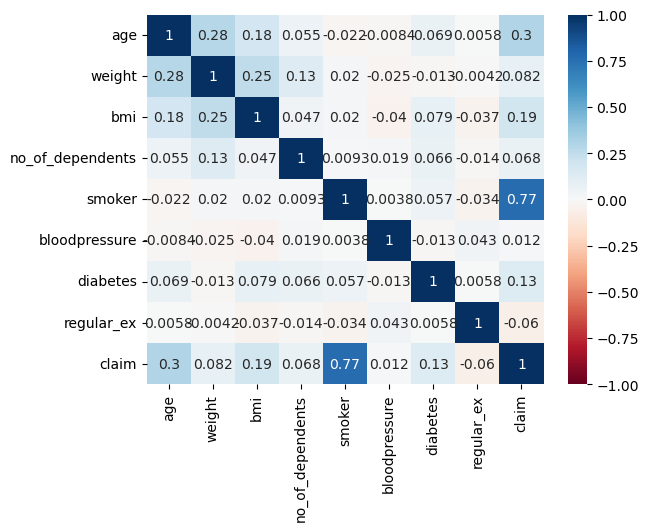

In [105]:
sns.heatmap(data.corr(),vmin=-1,vmax=+1,cmap="RdBu",annot=True)
plt.show()

In [106]:
data["age"]=data.groupby(["job_title"])["age"].transform(lambda x: x.fillna(x.median()))

In [107]:
data["age"].isnull().sum()

0

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13904 non-null  float64
 1   sex                  13904 non-null  object 
 2   weight               13904 non-null  int64  
 3   bmi                  13904 non-null  float64
 4   hereditary_diseases  13904 non-null  object 
 5   no_of_dependents     13904 non-null  int64  
 6   smoker               13904 non-null  int64  
 7   city                 13904 non-null  object 
 8   bloodpressure        13904 non-null  int64  
 9   diabetes             13904 non-null  int64  
 10  regular_ex           13904 non-null  int64  
 11  job_title            13904 non-null  object 
 12  claim                13904 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [109]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [110]:
data["sex"]=pd.get_dummies(data["sex"],drop_first=True)

In [111]:
data["hereditary_diseases"]=data["hereditary_diseases"].apply(lambda x:0 if x=="NoDisease" else 1)

In [112]:
northeast_cities = ['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo', 'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford', 'Worcester']

south_cities = ['Atlanta', 'Brimingham', 'Charleston', 'Charlotte', 'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity', 'Kingsport']

midwest_cities = ['Marshall', 'Mandan', 'Waterloo', 'IowaCity', 'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina', 'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln', 'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton', 'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity', 'Escabana', 'Youngstown']

west_cities = ['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose', 'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno', 'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman', 'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix', 'SantaFe', 'Lovelock']

In [113]:
def region(city):
    if city in northeast_cities:
        return "northeast cities"
    elif city in south_cities:
        return "south_cities"
    elif city in midwest_cities:
        return "midwest_cities"
    else:
        return "west_cities"
        

In [114]:
data["city"]=data["city"].apply(region) 

In [117]:
dummy=pd.get_dummies(data["city"],drop_first=True)

In [118]:
data = pd.get_dummies(data, columns=["city"], drop_first=True)

In [126]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,city_northeast cities,city_south_cities,city_west_cities,bmi*smoke
0,60.0,1,64,24.3,0,1,0,72,0,0,Actor,13112.6,1,0,0,0.0
1,49.0,0,75,22.6,0,1,0,78,1,1,Engineer,9567.0,1,0,0,0.0
2,32.0,0,64,17.8,1,2,1,88,1,1,Academician,32734.2,1,0,0,17.8
3,61.0,0,53,36.4,0,1,1,72,1,0,Chef,48517.6,1,0,0,36.4
4,19.0,0,50,20.6,0,0,0,82,1,0,HomeMakers,1731.7,1,0,0,0.0


In [122]:
data["bmi*smoke"]=data["bmi"]*data["smoker"]

In [128]:
data.drop("job_title",axis=1,inplace=True)

In [129]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,city_northeast cities,city_south_cities,city_west_cities,bmi*smoke
0,60.0,1,64,24.3,0,1,0,72,0,0,13112.6,1,0,0,0.0
1,49.0,0,75,22.6,0,1,0,78,1,1,9567.0,1,0,0,0.0
2,32.0,0,64,17.8,1,2,1,88,1,1,32734.2,1,0,0,17.8
3,61.0,0,53,36.4,0,1,1,72,1,0,48517.6,1,0,0,36.4
4,19.0,0,50,20.6,0,0,0,82,1,0,1731.7,1,0,0,0.0


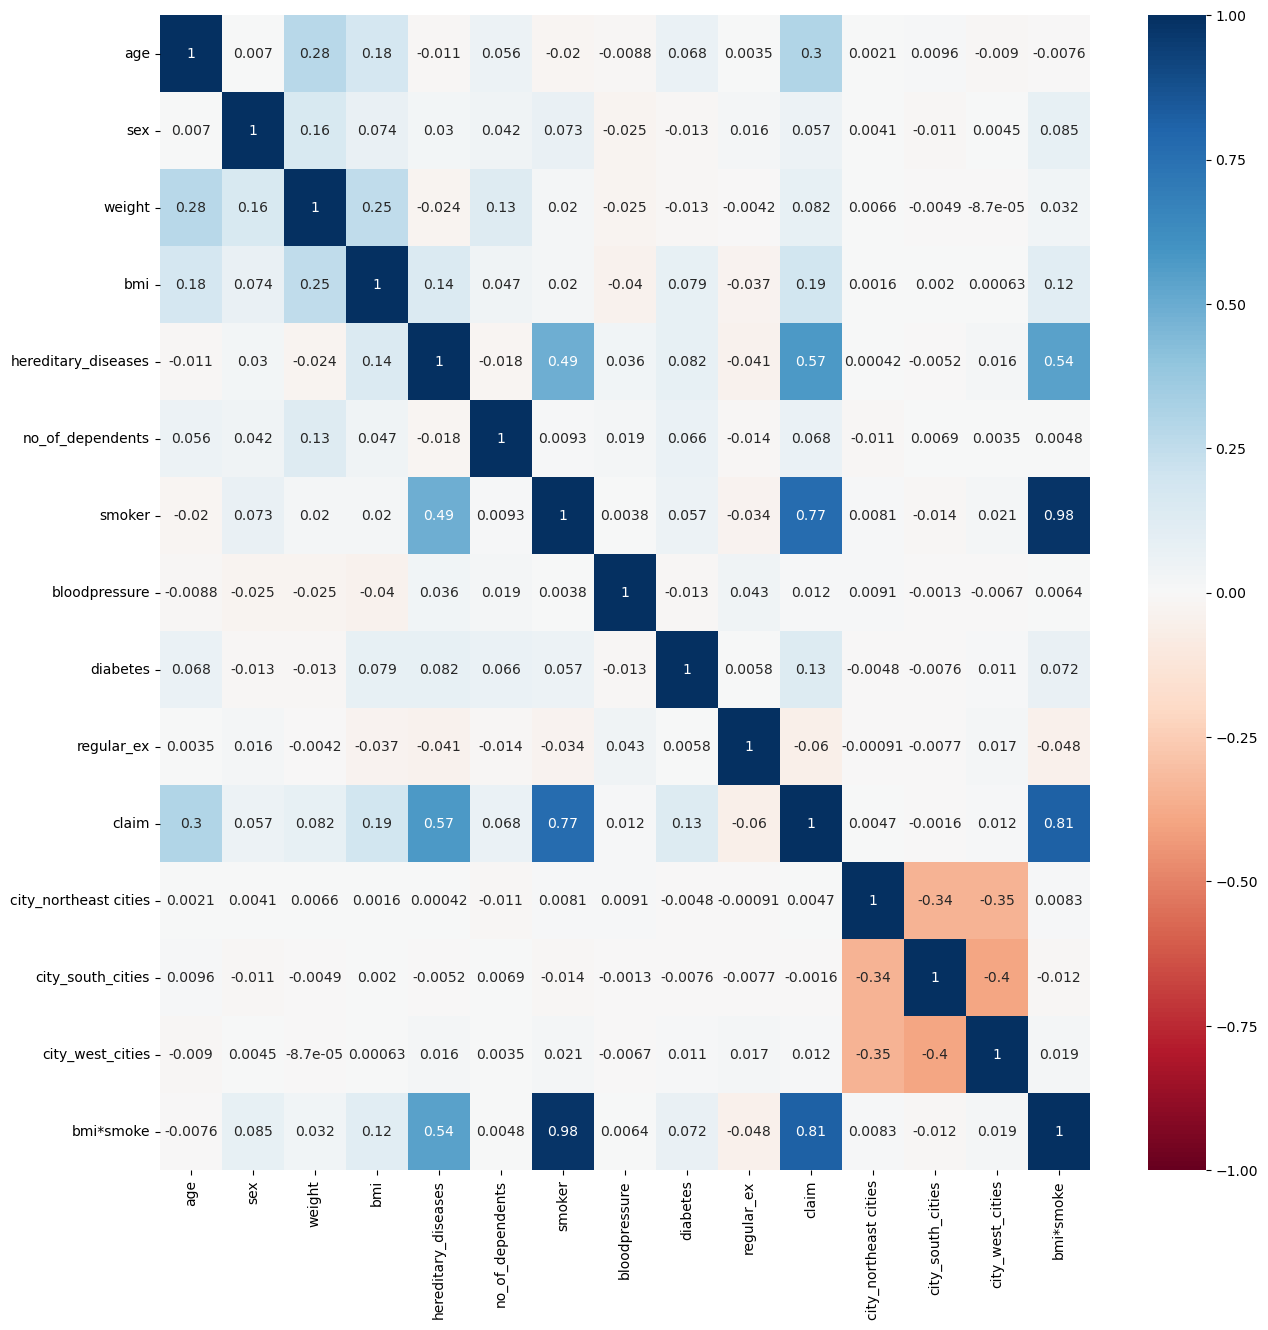

In [183]:
plt.figure(figsize=[15,15])
sns.heatmap(data.corr(),vmin=-1,vmax=+1,cmap="RdBu",annot=True)
plt.show()

### Model-

In [131]:
y=data["claim"]
x=data.drop("claim",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [132]:
model=sma.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  claim   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              7609.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:47:21   Log-Likelihood:                     -1.1172e+05
No. Observations:               11123   AIC:                                  2.235e+05
Df Residuals:                   11109   BIC:                                  2.236e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                     265.0349      3.983     66.547      0.000     257.228     272.842
sex                    -313.9819    107.710     -2.915      0.004    -525.112    -102.852
weight                  -39.7901      3.908    -10.182      0.000     -47.450     -32.130
bmi                      -2.8527      8.632     -0.330      0.741     -19.774      14.068
hereditary_diseases    8159.7457    256.629     31.796      0.000    7656.707    8662.785
no_of_dependents        536.2720     43.589     12.303      0.000     450.830     621.714
smoker                -1.002e+04    670.304    -14.943      0.000   -1.13e+04   -8702.636
bloodpressure            -3.2380      2.431     -1.332      0.183      -8.004       1.528
diabetes               1060.1733    124.676      8.503      0.000     815.787    1304.559
regular_ex             -486.9476    125.070     -3.893      0.000    -732.107    -241.788
city_northeast cities   -22.5207    158.198     -0.142      0.887    -332.617     287.576
city_south_cities        -6.9743    150.527     -0.046      0.963    -302.033     288.084
city_west_cities       -160.0596    150.808     -1.061      0.289    -455.671     135.552
bmi*smoke              1015.5035     22.346     45.445      0.000     971.701    1059.305
==============================================================================
Omnibus:                     3767.815   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19370.378
Skew:                           1.552   Prob(JB):                         0.00
Kurtosis:                       8.671   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
y_predict=model.predict(x_test)

In [137]:
r2_score(y_test,y_predict)

0.7909317220570644

In [138]:
y_train_pre=model.predict(x_train)

In [139]:
r2_score(y_train,y_train_pre)

0.7899803062807991